<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/main/Copia_de_ejemplo1SyS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [ ]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [ ]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [ ]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [ ]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [ ]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [ ]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [ ]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [ ]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [ ]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [ ]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [ ]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [ ]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [ ]:
xm[0:2,:2]

array([[ 0. , -2.5],
       [ 6. , 47. ]])

In [ ]:
xm[0:2,0]

array([0., 6.])

In [ ]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [ ]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
# crear vector tiempo por rango y por número de muestras
K = 500 # número de muestras
ti = 0 # tiempo incial referencia [s]
tf = 1/60 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

[0.00000000e+00 3.34001336e-05 6.68002672e-05 1.00200401e-04
 1.33600534e-04 1.67000668e-04 2.00400802e-04 2.33800935e-04
 2.67201069e-04 3.00601202e-04 3.34001336e-04 3.67401470e-04
 4.00801603e-04 4.34201737e-04 4.67601870e-04 5.01002004e-04
 5.34402138e-04 5.67802271e-04 6.01202405e-04 6.34602538e-04
 6.68002672e-04 7.01402806e-04 7.34802939e-04 7.68203073e-04
 8.01603206e-04 8.35003340e-04 8.68403474e-04 9.01803607e-04
 9.35203741e-04 9.68603874e-04 1.00200401e-03 1.03540414e-03
 1.06880428e-03 1.10220441e-03 1.13560454e-03 1.16900468e-03
 1.20240481e-03 1.23580494e-03 1.26920508e-03 1.30260521e-03
 1.33600534e-03 1.36940548e-03 1.40280561e-03 1.43620574e-03
 1.46960588e-03 1.50300601e-03 1.53640615e-03 1.56980628e-03
 1.60320641e-03 1.63660655e-03 1.67000668e-03 1.70340681e-03
 1.73680695e-03 1.77020708e-03 1.80360721e-03 1.83700735e-03
 1.87040748e-03 1.90380762e-03 1.93720775e-03 1.97060788e-03
 2.00400802e-03 2.03740815e-03 2.07080828e-03 2.10420842e-03
 2.13760855e-03 2.171008

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [ ]:
#parámetros parabola
a = 4
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[-3.         -3.         -2.99999998 -2.99999996 -2.99999993 -2.99999989
 -2.99999984 -2.99999978 -2.99999971 -2.99999964 -2.99999955 -2.99999946
 -2.99999936 -2.99999925 -2.99999913 -2.999999   -2.99999886 -2.99999871
 -2.99999855 -2.99999839 -2.99999822 -2.99999803 -2.99999784 -2.99999764
 -2.99999743 -2.99999721 -2.99999698 -2.99999675 -2.9999965  -2.99999625
 -2.99999598 -2.99999571 -2.99999543 -2.99999514 -2.99999484 -2.99999453
 -2.99999422 -2.99999389 -2.99999356 -2.99999321 -2.99999286 -2.9999925
 -2.99999213 -2.99999175 -2.99999136 -2.99999096 -2.99999056 -2.99999014
 -2.99998972 -2.99998929 -2.99998884 -2.99998839 -2.99998793 -2.99998747
 -2.99998699 -2.9999865  -2.99998601 -2.9999855  -2.99998499 -2.99998447
 -2.99998394 -2.9999834  -2.99998285 -2.99998229 -2.99998172 -2.99998115
 -2.99998056 -2.99997997 -2.99997937 -2.99997876 -2.99997813 -2.99997751
 -2.99997687 -2.99997622 -2.99997556 -2.9999749  -2.99997423 -2.99997354
 -2.99997285 -2.99997215 -2.99997144 -2.99997072 -2.

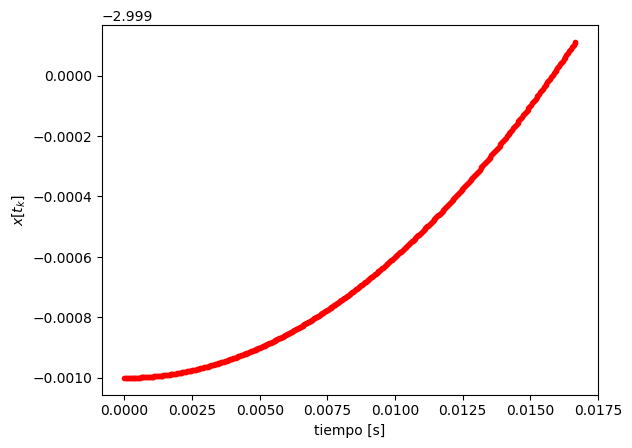

In [ ]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [ ]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = 0, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se llama la función definida en la celda anterior

In [ ]:
print(yv)
print(yv.shape)

[0.00000000e+00 2.00802406e-05 8.03209605e-05 1.80722165e-04
 3.21283849e-04 5.02006016e-04 7.22888662e-04 9.83931792e-04
 1.28513540e-03 1.62649949e-03 2.00802406e-03 2.42970912e-03
 2.89155465e-03 3.39356067e-03 3.93572717e-03 4.51805414e-03
 5.14054160e-03 5.80318954e-03 6.50599797e-03 7.24896687e-03
 8.03209626e-03 8.85538612e-03 9.71883647e-03 1.06224473e-02
 1.15662186e-02 1.25501504e-02 1.35742427e-02 1.46384954e-02
 1.57429087e-02 1.68874824e-02 1.80722166e-02 1.92971113e-02
 2.05621664e-02 2.18673821e-02 2.32127582e-02 2.45982948e-02
 2.60239919e-02 2.74898494e-02 2.89958675e-02 3.05420460e-02
 3.21283850e-02 3.37548845e-02 3.54215445e-02 3.71283649e-02
 3.88753459e-02 4.06624873e-02 4.24897892e-02 4.43572516e-02
 4.62648744e-02 4.82126578e-02 5.02006016e-02 5.22287059e-02
 5.42969707e-02 5.64053960e-02 5.85539817e-02 6.07427279e-02
 6.29716347e-02 6.52407018e-02 6.75499295e-02 6.98993177e-02
 7.22888663e-02 7.47185754e-02 7.71884450e-02 7.96984751e-02
 8.22486657e-02 8.483901

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

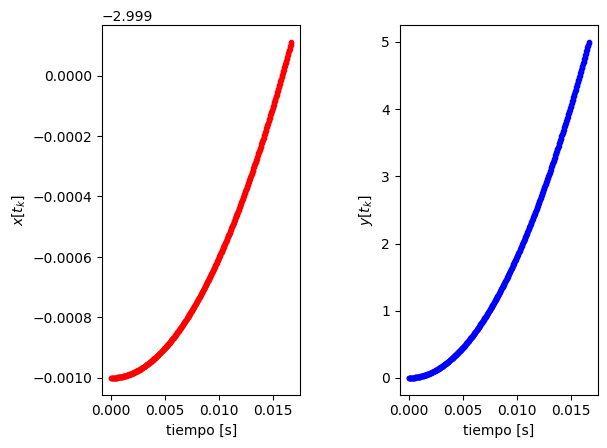

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

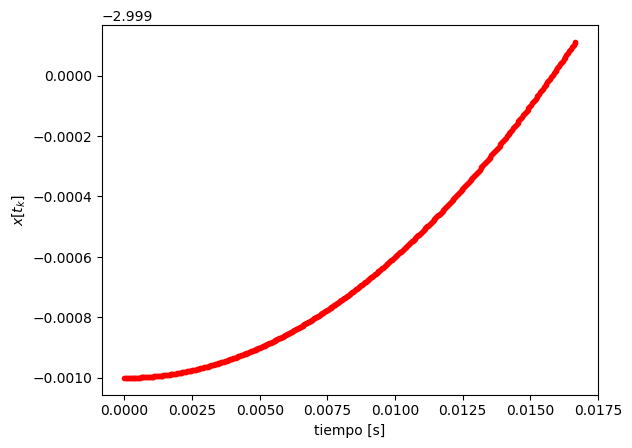

In [ ]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

Text(0, 0.5, '$y[t_k]$')

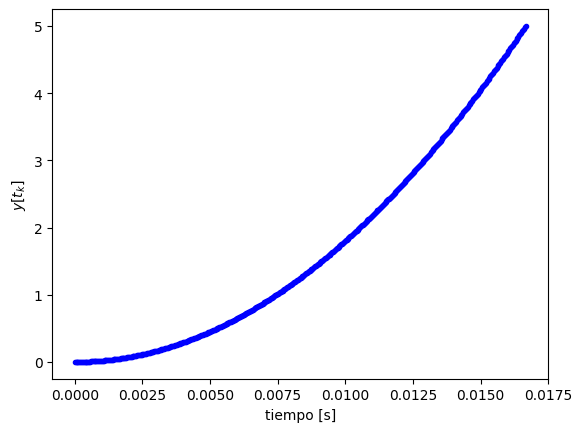

In [ ]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente utilizando una función seno:

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



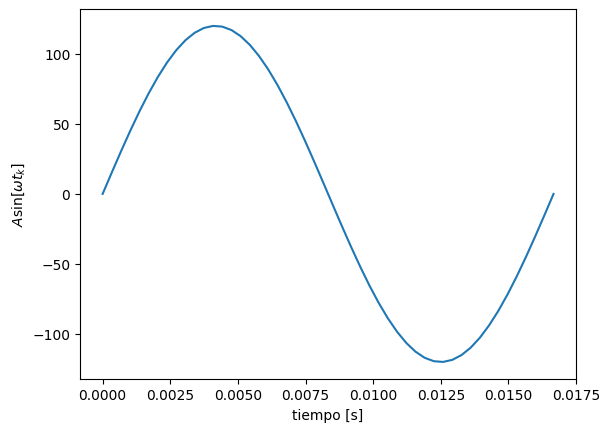

In [ ]:
K = 50 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [ ]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

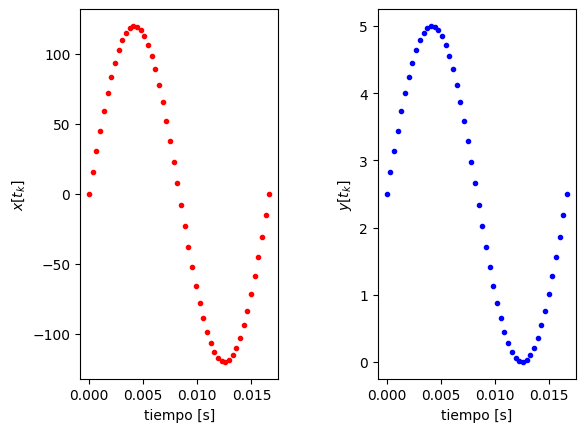

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).

- Consultar el funcionamiento de los métodos [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) y [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

- Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada para un conversor análogo-digital de 3 bits con entrada análoga de 0 a 10 [v]. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

<StemContainer object of 3 artists>

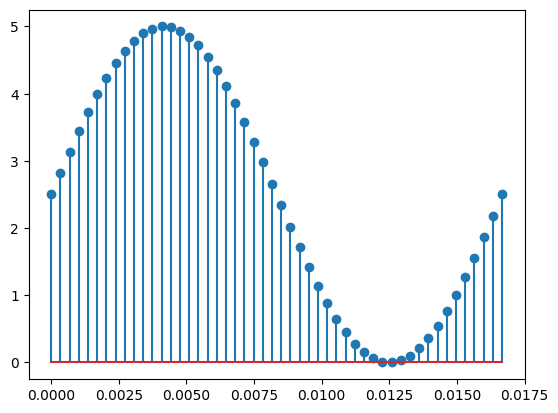

In [ ]:
import matplotlib.pyplot as plt
plt.stem(tv,yv)

In [ ]:
from scipy.spatial.distance import cdist
d = cdist(tv.reshape(-1,1),yv.reshape(-1,1))
distance.cdist(tv,yv,'euclidean')

**Ayuda para el ejercicio**: a continuación se presenta el funcionamiento de las funciones cdist y argmin

In [ ]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

y = 10*np.sin(2*np.pi*60*tv)
#número de bits
nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax
d = cdist(y.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(500, 8)

In [ ]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(y[50],ind[50],ve) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

0.5888034641594024 1 [0.         0.71428571 1.42857143 2.14285714 2.85714286 3.57142857
 4.28571429 5.        ]
